In [7]:
import pandas as pd

# Breast Cancer Wisconsin (Diagnostic) Data Set

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. Can be accessed in <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29">UCI Machine Learning Repository</a>

Tutorial about Training and Validation Loss Curves from <a href="https://www.youtube.com/watch?v=p3CcfIjycBA&list=WL&index=52&ab_channel=DigitalSreeni"> DigitalSreeni Youtube Channel</a>
   
### 1. Number of Instances: 699 (as of 15 July 1992)

### 2. Number of Attributes: 10 plus the class attribute

### 3. Attribute Information: (class attribute has been moved to last column)

   #  Attribute                     Domain
   -- -----------------------------------------
       1. Sample code number            id number
       2. Clump Thickness               1 - 10
       3. Uniformity of Cell Size       1 - 10
       4. Uniformity of Cell Shape      1 - 10
       5. Marginal Adhesion             1 - 10
       6. Single Epithelial Cell Size   1 - 10
       7. Bare Nuclei                   1 - 10
       8. Bland Chromatin               1 - 10
       9. Normal Nucleoli               1 - 10
       10. Mitoses                      1 - 10
       11. Class:                       (2 for benign, 4 for malignant)

### 4. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

### 5. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)
   
That's a inbalanced dataset. There's not much data. If we don't have enough data, the curves looks different

In [24]:
df_full = pd.read_csv('data/breast-cancer-wisconsin.data', sep=',')

In [25]:
df_full.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [26]:
df_full.columns = ['Id', 
                   'ClumpThickness', 
                   'Uniformity of Cell Size', 
                   'Uniformity of Cell Shape', 
                   'Marginal Adhesion', 
                   'SingleEpithelialCellSize', 
                   'BareNuclei', 
                   'BlandChromatin', 
                   'NormalNucleoli', 
                   'Mitoses', 
                   'Class'];

In [27]:
df_full.set_index(['Id'], inplace=True, drop=True)

In [28]:
df_full.head()

,ClumpThickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
Id,,,,,,,,,,
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


In [31]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 1002945 to 897471
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ClumpThickness            698 non-null    int64 
 1   Uniformity of Cell Size   698 non-null    int64 
 2   Uniformity of Cell Shape  698 non-null    int64 
 3   Marginal Adhesion         698 non-null    int64 
 4   SingleEpithelialCellSize  698 non-null    int64 
 5   BareNuclei                698 non-null    object
 6   BlandChromatin            698 non-null    int64 
 7   NormalNucleoli            698 non-null    int64 
 8   Mitoses                   698 non-null    int64 
 9   Class                     698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.0+ KB


In [29]:
df_full.describe()

,ClumpThickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,SingleEpithelialCellSize,BlandChromatin,NormalNucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [61]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 1002945 to 897471
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ClumpThickness            698 non-null    int64 
 1   Uniformity of Cell Size   698 non-null    int64 
 2   Uniformity of Cell Shape  698 non-null    int64 
 3   Marginal Adhesion         698 non-null    int64 
 4   SingleEpithelialCellSize  698 non-null    int64 
 5   BareNuclei                698 non-null    object
 6   BlandChromatin            698 non-null    int64 
 7   NormalNucleoli            698 non-null    int64 
 8   Mitoses                   698 non-null    int64 
 9   Class                     698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.0+ KB


In [84]:
df_full['Class'] = df_full['Class'].map({4 : 1, 2: 0}) # 1 = malign 0 = benign

In [30]:
from sklearn.model_selection import train_test_split

### Defining X and y

In [85]:
X = df_full.drop(['Class', 'BareNuclei'], axis=1) # BareNuclei is object, drop for now
y = df_full['Class']

### Normalizing data

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
minMaxObj = MinMaxScaler()
X_min_max = minMaxObj.fit_transform(X)

In [87]:
X_min_max

array([[0.44444444, 0.33333333, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.55555556, 0.77777778, 0.77777778, ..., 0.22222222, 0.66666667,
        0.        ],
       ...,
       [0.44444444, 1.        , 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.33333333, 0.77777778, 0.55555556, ..., 1.        , 0.55555556,
        0.        ],
       [0.33333333, 0.77777778, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

In [88]:
X = pd.DataFrame(X_min_max, columns=X.columns)
X.head()

,ClumpThickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,SingleEpithelialCellSize,BlandChromatin,NormalNucleoli,Mitoses
0,0.444444,0.333333,0.333333,0.444444,0.666667,0.222222,0.111111,0.0
1,0.222222,0.000000,0.000000,0.000000,0.111111,0.222222,0.000000,0.0
2,0.555556,0.777778,0.777778,0.000000,0.222222,0.222222,0.666667,0.0
3,0.333333,0.000000,0.000000,0.222222,0.111111,0.222222,0.000000,0.0
4,0.777778,1.000000,1.000000,0.777778,0.666667,0.888889,0.666667,0.0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [90]:
X_train.shape[1]

8

In [91]:
y_train[:5]

Id
1197510    0
535331     0
822829     1
1320304    0
1296572    1
Name: Class, dtype: int64

In [82]:
from tensorflow import keras
from tensorflow.keras import layers

# One dense layers with 16 neurons

In [96]:
model = keras.Sequential(
    [
        layers.Dense(units=16, activation='relu', input_shape=[X_train.shape[1]]),
        layers.Dropout(0.2),
        layers.Dense(units=1, activation='sigmoid'),
    ]
)

In [97]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None


In [100]:
history = model.fit(X_train , y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
9/9 [==============================] - 4s 58ms/step - loss: 0.6407 - accuracy: 0.4512 - val_loss: 0.6332 - val_accuracy: 0.4286
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6274 - accuracy: 0.5545 - val_loss: 0.6180 - val_accuracy: 0.5429
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.6101 - accuracy: 0.6463 - val_loss: 0.6036 - val_accuracy: 0.6400
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6035 - accuracy: 0.6616 - val_loss: 0.5896 - val_accuracy: 0.7029
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.5858 - accuracy: 0.7457 - val_loss: 0.5757 - val_accuracy: 0.7714
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.5749 - accuracy: 0.7839 - val_loss: 0.5614 - val_accuracy: 0.8343
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.5559 - accuracy: 0.8470 - val_loss: 0.5474 - val_accuracy: 0.8857
Epoch 8/50
9/9 [=================

In [101]:
acc = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.9771


In [102]:
acc

[0.15762852132320404, 0.977142870426178]

In [112]:
# predict
pred = model.predict(X_test) # return an array with a range from 0 to 1
pred = (pred > 0.5) # if > 0.5 return 1, for malign, otherwise return 0, for benign

In [113]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       115
           1       0.94      1.00      0.97        60

    accuracy                           0.98       175
   macro avg       0.97      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [126]:
cfmatrix = confusion_matrix(y_test, pred)

In [127]:
cfmatrix

array([[111,   4],
       [  0,  60]], dtype=int64)

<AxesSubplot:>

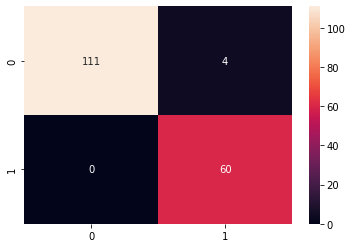

In [132]:
sns.heatmap(cfmatrix, annot=True, fmt='d')

In [105]:
# plot train and accuracy loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1) # 1 - 50

In [106]:
import matplotlib.pyplot as plt

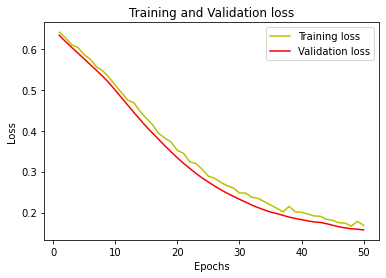

In [110]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

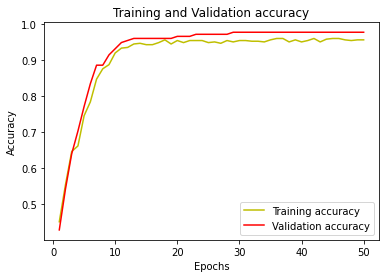

In [111]:
# plot train and accuracy loss
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1) # 1 - 50

plt.plot(epochs, loss, 'y', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**The more the non linearity the more deeper must be the neural network**

Usually the training should be better than validation set, we can see in both graphs that, the loss for validation is smaller than training and in accuracy, the validation set is performing better than training.